[View in Colaboratory](https://colab.research.google.com/github/HAN-AR/VIANOVA-congestion-ix35/blob/master/iX35/ix35_analysis.ipynb)

General setup -- import libraries and mount GDrive

In [7]:
from google.colab import drive
drive.mount('/content/drive')
root = '/content/drive/My Drive/iX35/'

!pip install feather-format
!pip install gmaps

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import datetime
import glob
import sys
import time
import gmaps
with open(root + 'gmaps.key') as f:
  gmaps.configure(api_key = f.read().strip())

import feather
pd.read_feather = feather.read_dataframe

%matplotlib inline



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the summary table, and select trips with a motorway streak > 0:30 (summary is calculated by summary.py)

In [15]:
summary = pd.read_csv(root + 'data/summary.csv')
trips = summary[summary.motorway_streak > '00:30'].reset_index()[['car', 'trip', 'motorway', 'motorway_streak']]
trips.trip = root + trips['trip'].astype(str) + '.feather'
trips = trips.sort_values(by=['motorway_streak'], ascending=False)
trips = trips.reset_index(drop=True)
trips

,car,trip,motorway,motorway_streak
0,1,/content/drive/My Drive/iX35/data/iX_35_final_...,02:06:33.600000000,02:06:33.600000000
1,3,/content/drive/My Drive/iX35/data/iX_35_final_...,01:55:41.600000000,01:46:26.600000000
2,2,/content/drive/My Drive/iX35/data/iX_35_final_...,01:41:46.800000000,01:25:07.400000000
3,1,/content/drive/My Drive/iX35/data/iX_35_final_...,02:32:23.600000000,01:23:55.400000000
4,2,/content/drive/My Drive/iX35/data/iX_35_final_...,01:26:47.200000000,01:14:58.800000000
5,2,/content/drive/My Drive/iX35/data/iX_35_final_...,02:00:41.200000000,01:13:01.400000000
6,1,/content/drive/My Drive/iX35/data/iX_35_final_...,01:43:21.000000000,01:11:40.000000000
7,3,/content/drive/My Drive/iX35/data/iX_35_final_...,01:12:42.000000000,01:11:18.000000000
8,3,/content/drive/My Drive/iX35/data/iX_35_final_...,01:22:01.000000000,01:10:55.000000000
9,2,/content/drive/My Drive/iX35/data/iX_35_final_...,01:19:16.000000000,01:10:27.000000000


Load and prep a trip

In [7]:
def load_trip(t):
  df = pd.read_feather(t)

  # feather format doesn't allow saving timestamp indexes, so restore it here
  df.set_index('timestamp', inplace=True)
  
  # forward fill of missing values and remove remaining
  #df.fillna(method='ffill', inplace=True)
  #df.dropna(inplace=True)

  # remove all non-motorway samples and samples that don't have a maxspeed
  # must be done before the resample or the resampled timestamps would also
  # disappear
  df = df[(df['road_type'] == 'motorway') & pd.notnull(df.road_maxspeed)]
  
  # normalize to 1s
  df = df.resample('s').agg({      
    'car': 'first',
    'trip': 'first',
      
    'acceleration_latitudinal_g': np.mean,
    'acceleration_longitudinal_g': np.mean,
    'brakepedal_mm': np.mean,
    'speed_km_h': np.mean,
    'steeringangle_deg': np.mean,
    'throttlepedal_pct': np.mean,
    'yaw_rate_deg_s': np.mean,

    'latitude': 'first',
    'longitude': 'first',

    'road_lanes': 'first',
    'road_maxspeed': 'first',
    'road_type': 'first',
    'road_class': 'first',
    'road_name': 'first',
    'road_latitude': 'first',
    'road_longitude': 'first',
  })

  # calculate fraction of maxspeed
  df['maxspeed_fraction'] = df['speed_km_h'] / df['road_maxspeed']
  
  # non-motorway = red, < .7 = blue, >= .7 = green
  df['color'] = df.apply(lambda row: ('blue' if row['maxspeed_fraction'] < 0.7 else 'green') if row['road_type'] == 'motorway' else 'red', axis=1)
  
  # rush hour blocks
  df['rush'] = df.index.isin(df.between_time('07:00', '09:00', include_start=True, include_end=True).index) | df.index.isin(df.between_time('16:30', '18:30', include_start=True, include_end=True).index)
  
  return df

# example how to call it
load_trip(trips.iloc[1].trip)


,car,trip,acceleration_latitudinal_g,acceleration_longitudinal_g,brakepedal_mm,speed_km_h,steeringangle_deg,throttlepedal_pct,yaw_rate_deg_s,latitude,...,road_lanes,road_maxspeed,road_type,road_class,road_name,road_latitude,road_longitude,maxspeed_fraction,color,rush
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-11-03 16:55:30+01:00,1.0,1.446563e+09,0.020560,1.566929e-02,0.0,115.0,-0.5,67.716535,-0.376168,51.421869,...,3.0,130.0,motorway,0.0,A67,51.421831,5.703372,0.884615,green,True
2015-11-03 16:55:31+01:00,1.0,1.446563e+09,0.044409,-4.900000e-09,0.0,115.0,0.4,43.700787,-0.001172,51.421834,...,3.0,130.0,motorway,0.0,A67,51.421794,5.703838,0.884615,green,True
2015-11-03 16:55:32+01:00,1.0,1.446563e+09,0.087338,-1.566930e-02,0.0,115.0,5.6,41.732283,1.811312,51.421798,...,3.0,130.0,motorway,0.0,A67,51.421756,5.704309,0.884615,green,True
2015-11-03 16:55:33+01:00,1.0,1.446563e+09,0.131857,-3.133859e-02,0.0,115.0,5.7,42.519685,1.498814,51.421766,...,3.0,130.0,motorway,0.0,A67,51.421717,5.704782,0.884615,green,True
2015-11-03 16:55:34+01:00,1.0,1.446563e+09,0.095288,-3.133859e-02,0.0,115.0,1.7,45.275591,0.811321,51.421741,...,3.0,130.0,motorway,0.0,A67,51.421680,5.705252,0.884615,green,True
2015-11-03 16:55:35+01:00,1.0,1.446563e+09,0.038049,-4.900000e-09,0.0,115.0,0.3,40.157480,0.311325,51.421725,...,3.0,130.0,motorway,0.0,A67,51.421642,5.705723,0.884615,green,True
2015-11-03 16:55:36+01:00,1.0,1.446563e+09,-0.076428,-4.900000e-09,0.0,115.0,-4.9,39.370079,-1.813655,51.421709,...,3.0,130.0,motorway,0.0,A67,51.421604,5.706189,0.884615,green,True
2015-11-03 16:55:37+01:00,1.0,1.446563e+09,-0.004880,-4.900000e-09,0.0,115.0,-1.1,39.370079,-0.626166,51.421683,...,3.0,130.0,motorway,0.0,A67,51.421566,5.706660,0.884615,green,True
2015-11-03 16:55:38+01:00,1.0,1.446563e+09,-0.041449,-1.566930e-02,0.0,115.0,-2.0,40.157480,-0.626166,51.421654,...,2.0,130.0,motorway,0.0,A67,51.421528,5.707127,0.884615,green,True


In [10]:
# filename = filenames[0]
# dirfile = "data/iX_35_final_nr1/" + filename
# data = feather.read_dataframe(dirfile)
data['rush'] = [inrush(timestamp) for timestamp in data['timestamp']]
roadlist = data['road_type'].tolist()
speedlist = data['speed_km_h'].tolist()
maxspeedlist = data['road_maxspeed'].tolist()
rushlist = data['rush'].tolist()
lataccellist = data['acceleration_latitudinal_g'].tolist()
lonaccellist = data['acceleration_longitudinal_g'].tolist()
timestamplist = data['timestamp'].tolist()

NameError: ignored

In [0]:
try:
    rushx_start = rushlist.index(1)
    rushx_end = len(rushlist) - rushlist[::-1].index(1) - 1
except:
    rushx_start = 0
    rushx_end = 0

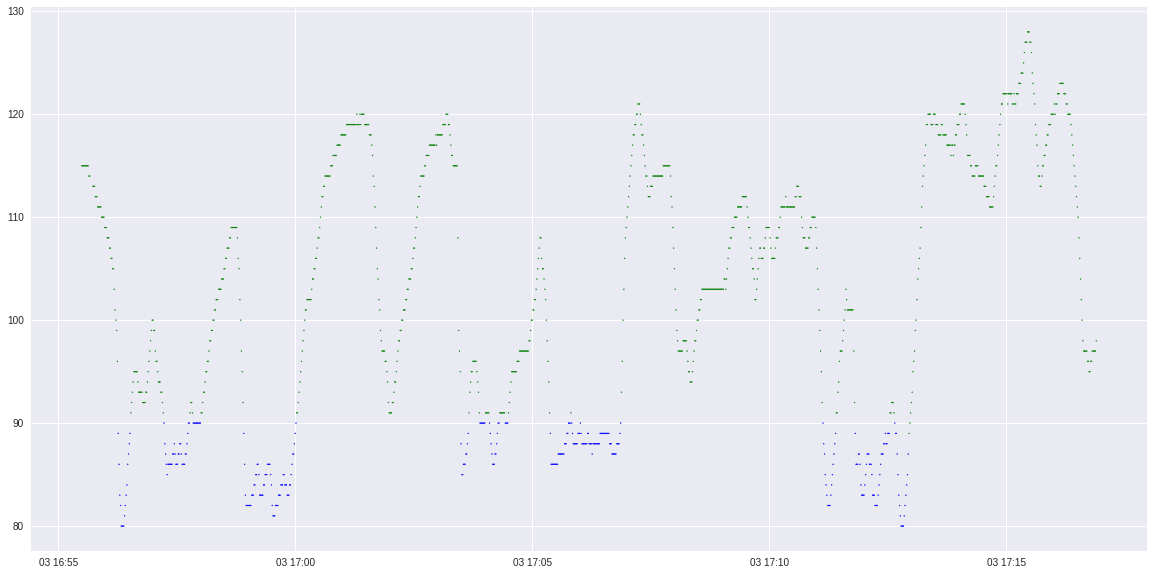

In [17]:
trip = load_trip(trips.iloc[0].trip)
plt.figure(figsize=(20,10))
#plt.axvspan(rushx_start, rushx_end, facecolor='black', alpha=0.15)
plt.scatter(trip.index,trip.speed_km_h, color=trip.color, s=1)

In [0]:
fracspeedlist = np.divide(speedlist,maxspeedlist)*100
plt.figure(figsize=(20,10))
axes = plt.gca()
axes.set_ylim([-10,150])
plt.plot(timestamplist,speedlist)
plt.plot(timestamplist,maxspeedlist, color = 'red')

In [0]:
plt.figure(figsize=(20,10))
axes = plt.gca()
axes.set_ylim([-0.5,0.5])
plt.plot(timestamplist,lataccellist)
plt.plot(timestamplist,lonaccellist, color = 'red')

In [0]:
for i,j,k in zip(speedthisfile, roadthisfile, maxspeedthisfile):
    islower = ''
    if i < 0.7* k:
        islower = ' Which is (more than) 70% lower than the maxspeed' 
    print('Drove: '+str(i)+' on a '+str(j)+ ' ' + str(k)+' road.' + islower)

# GMAPS

In [9]:
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(data[['lat','lon']])
fig.add_layer(heatmap_layer)
fig

NameError: ignored

# Scrap

In [0]:
timestamp = data['timestamp'].tolist()[1000]

In [0]:
timestamp.time()

In [0]:
timestamp.asm8

In [0]:
time = datetime.time(23,30)

In [0]:
time

In [0]:
timestamp > pd.Timestamp('6:00', tz=None)

In [0]:
filename = '2017-04-04-04-17-06.feather'
dirfile = "data/iX_35_final_nr1/" + filename
data = feather.read_dataframe(dirfile)
roadthisfile = data['road_type'].tolist()
speedthisfile = data['speed_km_h'].tolist()
maxspeedthisfile = data['road_maxspeed'].tolist()

for road in roadthisfile:
    print(road)

In [0]:
def get_rush_hours(timestamps):
    am_rush_start = datetime.time(7,0)
    am_rush_end = datetime.time(9,0)
    pm_rush_start = datetime.time(16,30)
    pm_rush_end = datetime.time(18,30)
    rush_start_i = 0
    rush_end_i = 0
    rush_start = am
    rush_end = timestamps[0]
    time = 0
    
    if (timestamps[0].hour < 9):
        for timestamp in timestamps:
            if (timestamp.time > ) :
                rush_start = timestamp

In [0]:
inrush(timestamp)

In [0]:
filename = '2017-04-04-04-17-06.feather'
dirfile = "data/iX_35_final_nr1/" + filename
data = feather.read_dataframe(dirfile)

In [0]:
timestamp.time()

In [0]:
plt.figure(num=None, figsize=(20, 10))
plt.plot(speeds[11])
plt.show()

In [0]:
opened = 0
closed = 0
speeds = []
roads = []
filenames = []
lats = []
lons = []
for filename in os.listdir('data/iX_35_final_nr1'):
    if filename.endswith(".feather"): 
        dirfile = "data/iX_35_final_nr1/" + filename
        data = feather.read_dataframe(dirfile)
        try:
            road = data['road_type']
            speed = 
            print(filename)
            opened +=1
        except:
            print(filename + " couldn't open")
            closed +=1
print(count)

In [0]:
closed

In [0]:
filename = '2018-03-19-11-43-16.feather'
dirfile = "data/iX_35_final_nr1/" + filename
data = feather.read_dataframe(dirfile)

In [0]:
filename